importation des donnée CSV

In [2]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
import numpy as np

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col].replace(0, np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10428\1418328962.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10428\1418328962.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

Text(0.5, 1.0, 'Répartition de la variable cible')

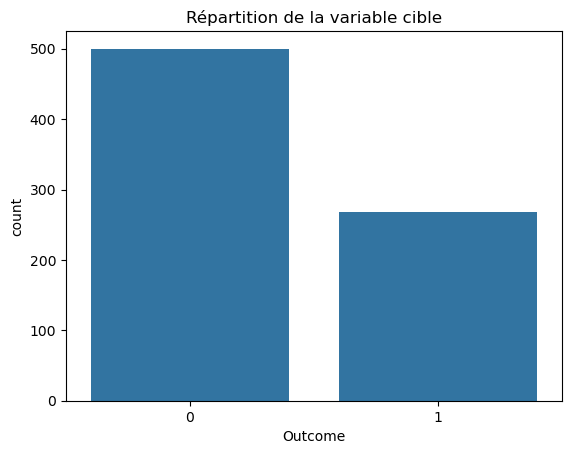

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title("Répartition de la variable cible")

In [11]:
df.groupby('Outcome').describe()


Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.682000  ...                  0.56175  2.329  500.0  31.190000   
1        142.130597  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

In [12]:
from sklearn.model_selection import train_test_split

X = X_scaled
y = df['Outcome']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 * 0.8 = 0.2

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_val_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1-score:", f1_score(y_val, y_val_pred))


Accuracy: 0.7532467532467533
Precision: 0.6428571428571429
Recall: 0.6666666666666666
F1-score: 0.6545454545454545


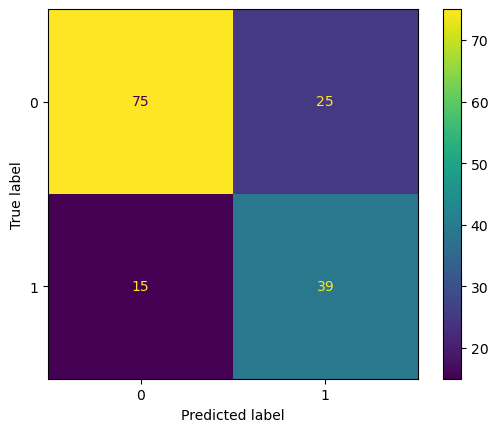

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [16]:
import numpy as np

coefficients = model.coef_[0]
features = df.columns[:-1]

feature_importance = pd.Series(np.abs(coefficients), index=features).sort_values(ascending=False)
print("Feature importance:\n", feature_importance)


Feature importance:
 Glucose                     1.381845
BMI                         0.922741
Pregnancies                 0.348019
DiabetesPedigreeFunction    0.346818
BloodPressure               0.193530
Insulin                     0.145927
SkinThickness               0.133823
Age                         0.114632
dtype: float64


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=['Non-diabétique', 'Diabétique']))


                precision    recall  f1-score   support

Non-diabétique       0.83      0.75      0.79       100
    Diabétique       0.61      0.72      0.66        54

      accuracy                           0.74       154
     macro avg       0.72      0.74      0.73       154
  weighted avg       0.75      0.74      0.74       154

